# Quantum Computing

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Imports
from qiskit import IBMQ, Aer, assemble
from qiskit.tools.monitor import job_monitor
from qiskit.providers.ibmq import least_busy
import qiskit as q
# from qiskit.tools.visualization import plot_bloch_sphere
from qiskit.visualization import plot_histogram, matplotlib
import matplotlib.pyplot as plt
from utils import dotdict
from DeutschJozsa.DeutschJozsa import DeutschJozsa
from BernsteinVazirani.BernsteinVazirani import BernsteinVazirani
from Simons.Simons import Simons
import os

In [3]:
# Config
args = dotdict()
args.location = "local"  # local or remote
args.local_backend = "qasm_simulator"
args.remote_backend = ""
args.shots = 500

In [4]:
base_dir = 'imgs/'
circuit_dir = base_dir + 'alg/'

if not os.path.exists(base_dir):
    os.mkdir(base_dir)

if not os.path.exists(circuit_dir):
    os.mkdir(circuit_dir)

In [5]:
def save_circuit(circuit, name=None):
    if name is None:
        name = alg.name + '_alg'
    return circuit.draw(output="mpl").savefig(circuit_dir + name + '.pdf')

## Entanglement

In [6]:
qc = q.QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
print(qc)

     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


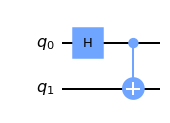

In [7]:
save_circuit(qc, "entanglement")

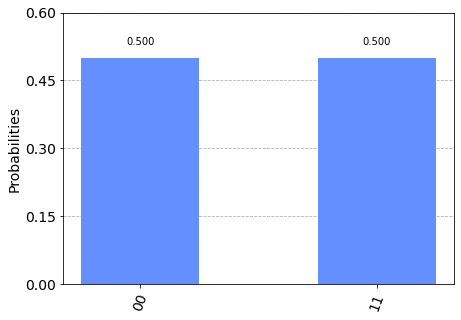

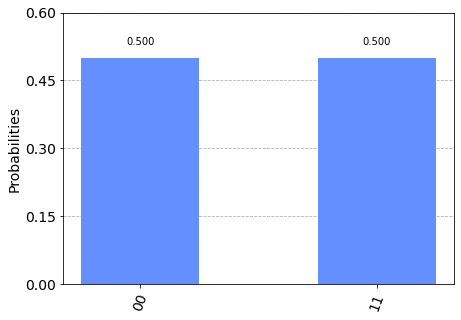

In [8]:
# Run on simulation
qobj = assemble(qc)
svsim = Aer.get_backend('statevector_simulator')
result = svsim.run(qobj).result()
plot_histogram(result.get_counts())

In [ ]:
# Run on remote QC
qc.measure_all()

IBMQ.save_account(open("token.txt", "r").read())
factory = IBMQ.load_account()
devices = factory.backends(filters=lambda x: x.configuration().n_qubits > 1 and
                                                   not x.configuration().simulator)
backend = least_busy(devices)

#IBMQ.enable_account(open("token.txt", "r").read())


job = q.execute(qc, backend, shots=500)
job_monitor(job)
result = job.result()


configrc.store_credentials:WARNING:2021-06-08 19:32:12,867: Credentials already present. Set overwrite=True to overwrite.


Job Status: job is queued (12)    

In [ ]:
plot_histogram(result.get_counts()).savefig('test')

In [ ]:
print(job.result().get_counts(qc))

In [ ]:
print('\nShor Code')
print('--------------')

from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit.tools.monitor import job_monitor

#IBMQ.enable_account(open("token.txt", "r").read())
provider = IBMQ.get_provider(hub='ibm-q')

backend = provider.get_backend('ibmq_qasm_simulator')

q = QuantumRegister(1,'q')
c = ClassicalRegister(1,'c')

circuit = QuantumCircuit(q,c)

circuit.h(q[0])

####error here############
circuit.x(q[0])#Bit flip error
circuit.z(q[0])#Phase flip error
############################

circuit.h(q[0])

circuit.barrier(q)

circuit.measure(q[0],c[0])

job = execute(circuit, backend, shots=1000)

job_monitor(job)

counts = job.result().get_counts()

print("\n Uncorrected bit flip and phase error")
print("--------------------------------------")
print(counts)

#####Shor code starts here ########
q = QuantumRegister(9,'q')
c = ClassicalRegister(1,'c')

circuit = QuantumCircuit(q,c)

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.barrier(q)

####error here############
circuit.x(q[0])#Bit flip error
circuit.z(q[0])#Phase flip error
############################

circuit.barrier(q)
circuit.cx(q[0],q[1])
circuit.cx(q[3],q[4])
circuit.cx(q[6],q[7])

circuit.cx(q[0],q[2])
circuit.cx(q[3],q[5])
circuit.cx(q[6],q[8])

circuit.ccx(q[1],q[2],q[0])
circuit.ccx(q[4],q[5],q[3])
circuit.ccx(q[8],q[7],q[6])

circuit.h(q[0])
circuit.h(q[3])
circuit.h(q[6])

circuit.cx(q[0],q[3])
circuit.cx(q[0],q[6])
circuit.ccx(q[6],q[3],q[0])

circuit.barrier(q)

circuit.measure(q[0],c[0])

circuit.draw(output='mpl',filename='shorcode.png') #Draws an image of the circuit

job = execute(circuit, backend, shots=1000)

job_monitor(job)

counts = job.result().get_counts()

print("\nShor code with bit flip and phase error")
print("----------------------------------------")
print(counts)

In [ ]:
print(job.result())

In [ ]:
print(counts)

In [ ]:
job.result().get_counts()

## DeutschJozsa

In [ ]:
# Config
args.deutsch_jozsa_n = 3
args.deutsch_jozsa_oracle = 'constant' # balanced or constant

In [ ]:
# Algorithm
alg = DeutschJozsa(args)

In [ ]:
# Circuit
save_circuit(alg.circuit)

In [ ]:
# Run
result = alg.run()

In [ ]:
# Result
counts = result.get_counts(alg.circuit)
plot_histogram([counts])

In [ ]:
# Save results.
alg.save_results()

alg.run_experiments()

NameError: name 'alg' is not defined

## Bernstein-Vazirani Algorithm

In [ ]:
# Config
args.bernstein_vazirani_s = '1001'

In [ ]:
# Algorithm
alg = BernsteinVazirani(args)

In [ ]:
# Circuit
save_circuit(alg.circuit)

In [ ]:
# Run
result = alg.run()

In [ ]:
# Result
counts = result.get_counts(alg.circuit)
plot_histogram([counts])

In [ ]:
# Save results.
alg.save_results()

## Simon's Algorithm

In [ ]:
# Config
args.simons_b = '1001'

In [ ]:
# Algorithm
alg = Simons(args)

In [ ]:
# Circuit
save_circuit(alg.circuit)

In [ ]:
# Run
result = alg.run()

In [ ]:
# Result
counts = result.get_counts(alg.circuit)
plot_histogram([counts])

In [ ]:
# Save results.
alg.save_results()

## Fourier?

## Hybrid Network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *

from HybridNet.HybridNet import QuantumCircuit, Net
from utils import dotdict

In [ ]:
simulator = qiskit.Aer.get_backend('qasm_simulator')

circuit = QuantumCircuit(1, simulator, 100)
print('Expected value for rotation pi {}'.format(circuit.run([np.pi])[0]))
print(circuit._circuit)
# TODO Save image
save_circuit(circuit._circuit, 'quantum_hybrid_net_circuit')

In [ ]:
# Training data.
# Concentrating on the first 100 samples
n_samples = 100

X_train = datasets.MNIST(root='./data', train=True, download=True,
                            transform=transforms.Compose([transforms.ToTensor()]))

# Leaving only labels 0 and 1
idx = np.append(np.where(X_train.targets == 0)[0][:n_samples],
                np.where(X_train.targets == 1)[0][:n_samples])

X_train.data = X_train.data[idx]
X_train.targets = X_train.targets[idx]

train_loader = torch.utils.data.DataLoader(X_train, batch_size=1, shuffle=True)

In [ ]:
n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0].numpy().squeeze(), cmap='gray')
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets.item()))

    n_samples_show -= 1

plt.show()

In [ ]:
# Testing data
n_samples = 50

X_test = datasets.MNIST(root='./data', train=False, download=True,
                        transform=transforms.Compose([transforms.ToTensor()]))

idx = np.append(np.where(X_test.targets == 0)[0][:n_samples], 
                np.where(X_test.targets == 1)[0][:n_samples])

X_test.data = X_test.data[idx]
X_test.targets = X_test.targets[idx]

test_loader = torch.utils.data.DataLoader(X_test, batch_size=1, shuffle=True)


In [ ]:
# Training the model.
model = Net()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_func = nn.NLLLoss()

epochs = 20
loss_list = []

model.train()
for epoch in range(epochs):
    total_loss = []
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        # Forward pass
        output = model(data)
        # Calculating loss
        loss = loss_func(output, target)
        # Backward pass
        loss.backward()
        # Optimize the weights
        optimizer.step()
        
        total_loss.append(loss.item())

    loss_list.append(sum(total_loss)/len(total_loss))
    print('Training [{:.0f}%]\tLoss: {:.4f}'.format(
        100. * (epoch + 1) / epochs, loss_list[-1]))

In [ ]:
# Plot training.
plt.plot(loss_list)
plt.title('Hybrid NN Training Convergence')
plt.xlabel('Training Iterations')
plt.ylabel('Neg Log Likelihood Loss')
plt.show()

In [ ]:
# Evaluating the model.
model.eval()
with torch.no_grad():
    
    correct = 0
    for batch_idx, (data, target) in enumerate(test_loader):
        output = model(data)
        
        pred = output.argmax(dim=1, keepdim=True) 
        correct += pred.eq(target.view_as(pred)).sum().item()
        
        loss = loss_func(output, target)
        total_loss.append(loss.item())
        
    print('Performance on test data:\n\tLoss: {:.4f}\n\tAccuracy: {:.1f}%'.format(
        sum(total_loss) / len(total_loss),
        correct / len(test_loader) * 100))

In [ ]:
# Testing the model.
n_samples_show = 6
count = 0
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

model.eval()
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(test_loader):
        if count == n_samples_show:
            break
        output = model(data)
        
        pred = output.argmax(dim=1, keepdim=True) 

        axes[count].imshow(data[0].numpy().squeeze(), cmap='gray')

        axes[count].set_xticks([])
        axes[count].set_yticks([])
        axes[count].set_title('Predicted {}'.format(pred.item()))
        
        count += 1

In [ ]:
# Visualize the network.
from torchviz import make_dot
x = torch.randn(1, 1, 28, 28)
yhat = model(x)
make_dot(yhat, params=dict(model.named_parameters()))